Python Data Analysis project

Shlyakhtina Liudmila

In [59]:
# Import libraries.
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [ ]:
# Download UD dataset.
!curl -O https://pages.llf-paris.fr/~gwisniewski/assets/2025/transfer_scores.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1 4826k    1 92990    0     0  73858      0  0:01:06  0:00:01  0:01:05 74154
 39 4826k   39 1914k    0     0   851k      0  0:00:05  0:00:02  0:00:03  853k
100 4826k  100 4826k    0     0  1497k      0  0:00:03  0:00:03 --:--:-- 1500k


1.  Briefly describe the task of PoS tagging. Why is the ability to predict PoS tags  still useful in the era of ChatGPT-like models?

==>  PoS tagging is the task of assigning a word its part of speech, morphosyntactic category (such as noun, adverb, verb etc.) It is still useful in tasks such as dependency parsing, named entity recognition and information extraction. For example, PoS tagging is used in TTS since it helps with natural intonation by .

 2. Why should training and test corpora be kept separate? Is the use of predefined train–test splits, as in the UD project, a good idea or not? Motivate your answer.

==> If test corpora is a part of the training one, the model might overfit: it would see the correct predictions during the training state and will perform perfectly in the evaluation stage. That does not mean the model actually learned something: it just learned to predict the correct answers. That is why data is usually split into train and test sets (sometimes val for adjusting hyperparameters) so the model's performance can be judged fairly.

 3. Why are the data stored in a TSV rather than a CSV format? How can they be  loaded into a dataframe?

==> Because columns are separated not by commas (as in CSV format) but by tabs. In order to load it, one should just add that separator is tab as done below:

In [3]:
data = pd.read_csv('transfer_scores.tsv',sep='\t') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43490 entries, 0 to 43489
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target_lang  43490 non-null  object 
 1   model_lang   43490 non-null  object 
 2   target_ud    43490 non-null  object 
 3   model_ud     43490 non-null  object 
 4   Tokens       43490 non-null  float64
 5   Sentences    43490 non-null  float64
 6   Words        43490 non-null  float64
 7   UPOS         43490 non-null  float64
 8   XPOS         43490 non-null  float64
 9   UFeats       43490 non-null  float64
 10  AllTags      43490 non-null  float64
 11  Lemmas       43490 non-null  float64
 12  UAS          43490 non-null  float64
 13  LAS          43490 non-null  float64
 14  CLAS         43490 non-null  float64
 15  MLAS         43490 non-null  float64
 16  BLEX         43490 non-null  float64
 17  target_iso3  43343 non-null  object 
 18  model_iso3   43490 non-null  object 
dtypes: f

In [4]:
data

,target_lang,model_lang,target_ud,model_ud,Tokens,Sentences,Words,UPOS,XPOS,UFeats,AllTags,Lemmas,UAS,LAS,CLAS,MLAS,BLEX,target_iso3,model_iso3
0,Abkhaz,Afrikaans,ab_abnc,af_afribooms,99.95,0.00,99.95,28.32,0.00,37.12,0.00,32.32,9.21,3.94,0.49,0.02,0.07,abk,afr
1,Abkhaz,Arabic,ab_abnc,ar_padt,98.69,6.38,98.69,27.87,0.00,41.87,0.00,31.32,9.68,3.01,1.06,0.00,0.00,abk,arb
2,Abkhaz,Belarusian,ab_abnc,be_hse,99.51,78.49,99.51,43.37,0.00,35.47,0.00,32.10,20.10,10.62,4.24,0.00,0.24,abk,bel
3,Abkhaz,Bulgarian,ab_abnc,bg_btb,99.95,31.17,99.95,36.96,0.00,33.60,0.00,31.21,18.90,6.99,4.25,0.00,0.00,abk,bul
4,Abkhaz,Catalan,ab_abnc,ca_ancora,99.88,50.22,99.88,33.26,0.00,44.30,0.00,31.59,8.89,4.63,1.50,0.14,0.00,abk,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43485,Chinese,Vietnamese,zh_pud,vi_vtb,21.49,96.20,21.49,19.60,16.77,21.19,16.68,21.20,1.39,1.28,0.24,0.16,0.23,cmn,vie
43486,Chinese,Wolof,zh_pud,wo_wtb,12.02,98.80,12.02,10.54,0.00,11.56,0.00,11.93,0.53,0.52,0.26,0.00,0.26,cmn,wol
43487,Chinese,Classical Armenian,zh_pud,xcl_caval,15.61,96.88,15.61,14.16,0.00,14.83,0.00,15.14,0.19,0.15,0.00,0.00,0.00,cmn,xcl
43488,Chinese,Chinese,zh_pud,zh_gsd,88.01,97.47,88.01,78.89,84.61,86.67,77.60,87.95,60.73,49.41,43.02,34.71,42.99,cmn,cmn


 4. How many different training corpora are available?

"the language and UD corpus ID of the model (the corpus on which the model is
 trained) — columns model_lang and model_ud"

In [ ]:
data["model_ud"].nunique() # Model_ud contains corpora for training according to the project description.

147

5. How many different test corpora are available?

"the language and UD corpus ID of the evaluation data — columns target_lang and target_ud"

In [ ]:
data["target_ud"].nunique() # As said in the description, a corpus can appear in target_ud even if it has no training data, therefore we take unique values in target_ud.

296

6. How many different languages are represented in the data?

In [ ]:
len(set(data["model_lang"]).union(set(data["target_lang"]))) 
# We count both train and test languages since some of the languages are test only. 
# Set and union are used to avoid dublicates.

168

 7. Plot the distribution of the number of corpora per language (x-axis : number of corpora; y-axis : number of languages with that number of corpora).

<Axes: xlabel='count'>

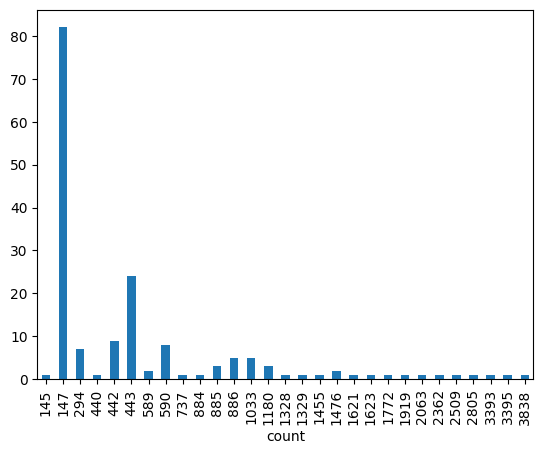

In [ ]:
dist = pd.Series(pd.concat([data.model_ud, data.target_ud]).str.split("_").str[0]).value_counts().value_counts().sort_index()
dist.plot(kind="bar") # Here we take all corpora id by extracting language code before "_" (e.g. be_hse -> be), then count how many languages have that number of corpora and sort by number for the graph.
# First value_counts: how many corpora per language, second value_counts: how many languages have that number of corpora.

 8. How many languages have three training corpora?

In [ ]:
counts = data.groupby("model_lang")["model_ud"].nunique() 
len(counts[counts==3])
# We group the data by model_lang, count how many distinct corpora each language has,
# keep only languages that satisfy the condition 'count is exactly 3' and count how many such languages there are.

In [13]:
(data.groupby("model_lang")["model_ud"].nunique())[counts==3] # These are the languages with exactly 3 training corpora.

model_lang
Ancient Greek    3
Hebrew           3
Icelandic        3
Korean           3
Romanian         3
Name: model_ud, dtype: int64

 9. Which language has the highest number of corpora?

It was not quite clear for me which kind of corpora is needed so I did all the three cases.

9.1 Which language has the highest number of test corpora?

In [ ]:
data.groupby("target_lang")["target_ud"].nunique().idxmax() # We count distinct evaluation corpora per language and get the highest with idxmax.

'English'

9.2 Which language has the highest number of training corpora?

In [ ]:
data.groupby("model_lang")["model_ud"].nunique().idxmax() # Same code as above, just replace test variables with train variables.

'Italian'

9.3 Which language has the highest number of combined corpora?

In [ ]:
# Here we just combine two lines from above and only apply idxmax in the end.
(data.groupby("model_lang")["model_ud"].nunique().add(data.groupby("target_lang")["target_ud"].nunique())).idxmax()

'Italian'

ANALYSIS OF SCORES

 10. Considering only the in-domain scores (same train and test corpus), compute the mean, median, minimum, and maximum scores.

In [ ]:
data[(data["model_lang"] == data["target_lang"]) & (data["model_ud"] == data["target_ud"])]["UPOS"].agg(['mean', 'median', 'min', 'max'])
# Filter rows where training corpus and test corpus are the same, extract UPOS values and compute the four main stats.

mean      95.176667
median    96.910000
min       73.380000
max       99.730000
Name: UPOS, dtype: float64

11. Answer the same questions while considering only the out-of-domain scores (train and test corpora differ, but the language is the same). Comment on your observations.

In [24]:
data[(data["model_lang"] == data["target_lang"]) & (data["model_ud"] != data["target_ud"])]["UPOS"].agg(['mean', 'median', 'min', 'max'])
# The code is similar to the one above, but the condition changed to 'same language, different corpora'.

mean      85.024837
median    91.030000
min        0.170000
max       98.860000
Name: UPOS, dtype: float64

==> One could notice that in the latter case (different corpora) performance drops (by -10.15% for mean, -5.88% for median, -73.21% for min, -0.87% for max).
However, it does not mean that in-domain scores are any better that the out-of-domain ones. This is exactly what we have talked about back in question 2: even though in-domains scores might be near perfect, they do not repressent the model's performace since test data had been leaked during training phase. The model learned to predict the data for evaluation while training and performs perfect on that exact data during evaluation, which is not suprising. Therefore, we cannot assess the real model's quality in this case since it alreaady saw the gold classes, correct UPOS labels here, during training phase.

The second case, on the other hand, is much more informative. It actually judges the models' performance since the golden rule 'do not mix training and test sets' was not broken. Out of all the models presented in this dataset, the mean of predicting tags correctly is 85% while median is 91%. Even though the numbers themselves look promising, it would be useful to have some kind of baseline to compare UD's performance but there is none given in this project.

12. Repeat the same questions for the cross-lingual transfer scores (train and test languages differ).

In [ ]:
data[(data["model_lang"] != data["target_lang"]) & (data["model_ud"] == data["target_ud"])]["UPOS"].agg(['mean', 'median', 'min', 'max'])

mean     NaN
median   NaN
min      NaN
max      NaN
Name: UPOS, dtype: float64

==> As the table above shows, there is no data found where languages are different but corpora is the same. It is not surprising, though, since there are no corpora for two different languages.

In [ ]:
data[(data["model_lang"] != data["target_lang"]) & (data["model_ud"] != data["target_ud"])]["UPOS"].agg(['mean', 'median', 'min', 'max'])
# One could remove the second condition here since there are no corpora with different languages and run this instead:


mean      35.024062
median    34.030000
min        0.000000
max       98.520000
Name: UPOS, dtype: float64

==> This result is the most important for this project, showing exactly the performance of cross-lingual model transfer: without breaking the golden rule of not mixing train and test sets together, how well can a model trained on train data from language A perform on test data from language B? As it turns out, not that well: only 35% of the UPoS tags were correctly predicted. In some extreme case none of the tags were predicted correctly; however, for some case a fantastic percentage of 98.52% correctly predicted tags was reached.

13. Construct a dataframe that, for each French test corpus, contains the following information :
 
 — the in-domain performance (if available, otherwise NaN),
 
 — the best out-of-domain performance,
 
 — the best cross-lingual transfer performance,
 
 — the language achieving this best transfer score.
 
 Provide a short commentary.

In [47]:
fr_data = data.query("target_lang == 'French'").groupby("target_ud").apply(lambda g: pd.Series({
    "in_domain": g.query("model_lang == 'French' and model_ud == target_ud").UPOS.max(), # This is just copied from above.
    "best_out_domain": g.query("model_lang == 'French' and model_ud != target_ud").UPOS.max(),
    "best_cross_lingual": g.query("model_lang != 'French'").UPOS.max(), # We do not need to specify that corpora is not same due to explanations above.
    "best_transfer_lang": g.query("model_lang != 'French'").loc[lambda x: x.UPOS.idxmax(), "model_lang"] 
})).reset_index()
fr_data

C:\Users\localuser\AppData\Local\Temp\ipykernel_28956\66162783.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fr_data = data.query("target_lang == 'French'").groupby("target_ud").apply(lambda g: pd.Series({


,target_ud,in_domain,best_out_domain,best_cross_lingual,best_transfer_lang
0,fr_fqb,NaN,96.17,80.49,Catalan
1,fr_gsd,97.47,96.72,84.12,Catalan
2,fr_parisstories,97.45,96.98,80.06,Old French
3,fr_partut,97.78,96.00,85.89,Italian
4,fr_pud,NaN,96.21,85.20,Italian
5,fr_rhapsodie,97.45,97.03,84.28,Old French
6,fr_sequoia,98.38,96.96,83.35,Catalan


==> There are six distinct French corpora found. Two of them have no data on in-domain performace; others scored no less than 97.45% labels correctly predicted on themselves.

Models trained on French and tested on other French corpora also perform well, 96.00% being the worst score.

Performance drops on cross-lingual transfer cases. It is still considerably good since all the scores are in range 80.06, 85.89.

Finally, it is most interesting to look at the languages that performed the best in cross-lingual transfer situations. And it is not surprising that those languages are relatives of French, namely Italian, Old French and Catalan, all coming from Romance languages group. 

Conclusion: UPoS-predictors performed best on related languages.

 14. How many different languages achieve the best transfer score (considering all French test corpora)?

In [ ]:
fr_data['best_transfer_lang'].nunique() # Just take the column from new DataFrame above.

3

 15. Plot the distribution of in-domain, out-of-domain, and cross-lingual transfer scores across all test corpora using a violin plot. Interpret the results.

In [56]:
fr_data_m = fr_data.melt(
    id_vars=['target_ud'],
    value_vars=['in_domain', 'best_out_domain', 'best_transfer_lang'],
    var_name='score_type',
    value_name='UPOs'
)

pyplot.figure(figsize=(10,6))
sns.violinplot(x='score_type', y='UPOS', data=fr_data_m, inner='quartile', palette='Set2')
pyplot.ylabel('UPOS score')
pyplot.xlabel('Evaluation Type')
pyplot.show()

ValueError: Could not interpret value `UPOS` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

16. For each language and each test corpus, determine which training language yields the best cross-lingual transfer score.

17. For a given language, plot the distribution of the number of distinct training languages that achieve the best transfer score. Comment on your findings.

IMPACT OF LINGUISTIC TYPOLOGY

In [ ]:
# Downloading linguistic data.
!curl -O https://pages.llf-paris.fr/~gwisniewski/assets/2025/language_family.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7952  100  7952    0     0   7900      0  0:00:01  0:00:01 --:--:--  7952
100  7952  100  7952    0     0   7895      0  0:00:01  0:00:01 --:--:--  7952


In [66]:
with open("language_family.json", "r", encoding="utf-8") as f:
    langs = json.load(f) # Here we open thee .json file; it is a list of dictionaries.  
lang_data = pd.DataFrame(langs) # We turn it into a DataFrame like this.
lang_data

,language,family
0,Abkhaz,Abkhaz-Adyge
1,Abaza,Abkhaz-Adyge
2,Afrikaans,Indo-European
3,Assyrian,Afro-Asiatic
4,South Levantine Arabic,Afro-Asiatic
...,...,...
163,Umbrian,Indo-European
164,Yoruba,Atlantic-Congo
165,Nheengatu,Tupian
166,Cantonese,Sino-Tibetan


 18. Why is it natural that transfer performance varies with the source language?

==> As already stated in question 13, it is quite natural that a model performs best on languages related to the one the model was trained on. To elaborate, languages from the same group or family tend to have the same UPoS classes and those classes tend to have the same properties. For example, Russian tends to mark gender on adjectives according to the gender of the noun they are dependent on, while English does not - since Ukrainian adjectives work the same way as Russian ones do, it would be easier for a model trained on Ukrainian to predict UPoS tags on Russian rather than English. Information about word classes is important for UPoS since it pays attention to the context.

19. Why is it useful to predict which source language will yield the best performance for a given target?

==> One useful application I can think of is low-resourced languages. There are some morphological parsers that can do UPoS labeling automatically for some languages: English, German, Russian, Japanese etc. Those languages are usually ones with efficient data. However, what should you do if you want to get UPoS labels for a language that does not have a morphological parser yet? Looking at the current results, it seems logical to use a model trained on a related language with more data available since it might be successful at labeling data on another language. The information on the best performing language might also be useful for the exact opposite reason - proving that languages are related if they perform well at labeling each other's words with UPoS classes.

 20. Define the notion diachronic and synchronic similarities used in typological linguistics. Which one should you use to predict which source language will yield the best performance for a given target? Is the typological information available on Glottolog useful?

 21. How many language families are represented in language_family.json? Which family is most represented? What is the distribution of languages per family?

In [ ]:
lang_data["family"].nunique() # 32 unique language families in total.

32

In [ ]:
lang_data["family"].value_counts().idxmax() # The most languages are found in the most famous Indo-European family.

'Indo-European'

In [ ]:
lang_data["family"].value_counts() # As can be seen, the majority of families contain just 1 language in the dataset (18 out of 32).
# There are also some NaNs and the margin between the most represented and second most represented is extremely large.

family
Indo-European              76
Afro-Asiatic               13
Tupian                     11
Uralic                     11
Turkic                      9
['None']                    7
Austronesian                4
Atlantic-Congo              4
Sino-Tibetan                3
Dravidian                   3
Abkhaz-Adyge                2
Sign Language               2
Arawan                      2
Uto-Aztecan                 2
Mande                       1
Arawakan                    1
Athabaskan-Eyak-Tlingit     1
Eskimo-Aleut                1
Mongolic-Khitan             1
Chukotko-Kamchatkan         1
Bororoan                    1
Kartvelian                  1
Koreanic                    1
Japonic                     1
Bookkeeping                 1
Chibchan                    1
Mayan                       1
Tungusic                    1
Tai-Kadai                   1
Austroasiatic               1
Pama-Nyungan                1
Nuclear-Macro-Je            1
Name: count, dtype: int64

For the next questions we will merge the UD data and lingustic data into one new data_full DataFrame.

In [77]:
data_full = data.merge(lang_data.rename(columns={"language": "model_lang", "family": "source_family"}),
                       on="model_lang") \
                        .merge(lang_data.rename(columns={"language": "target_lang", "family": "target_family"}),
                            on="target_lang")
data_full

,target_lang,model_lang,target_ud,model_ud,Tokens,Sentences,Words,UPOS,XPOS,UFeats,...,Lemmas,UAS,LAS,CLAS,MLAS,BLEX,target_iso3,model_iso3,source_family,target_family
0,Abkhaz,Afrikaans,ab_abnc,af_afribooms,99.95,0.00,99.95,28.32,0.00,37.12,...,32.32,9.21,3.94,0.49,0.02,0.07,abk,afr,Indo-European,Abkhaz-Adyge
1,Abkhaz,Arabic,ab_abnc,ar_padt,98.69,6.38,98.69,27.87,0.00,41.87,...,31.32,9.68,3.01,1.06,0.00,0.00,abk,arb,Afro-Asiatic,Abkhaz-Adyge
2,Abkhaz,Belarusian,ab_abnc,be_hse,99.51,78.49,99.51,43.37,0.00,35.47,...,32.10,20.10,10.62,4.24,0.00,0.24,abk,bel,Indo-European,Abkhaz-Adyge
3,Abkhaz,Bulgarian,ab_abnc,bg_btb,99.95,31.17,99.95,36.96,0.00,33.60,...,31.21,18.90,6.99,4.25,0.00,0.00,abk,bul,Indo-European,Abkhaz-Adyge
4,Abkhaz,Catalan,ab_abnc,ca_ancora,99.88,50.22,99.88,33.26,0.00,44.30,...,31.59,8.89,4.63,1.50,0.14,0.00,abk,cat,Indo-European,Abkhaz-Adyge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43338,Chinese,Vietnamese,zh_pud,vi_vtb,21.49,96.20,21.49,19.60,16.77,21.19,...,21.20,1.39,1.28,0.24,0.16,0.23,cmn,vie,Austroasiatic,Sino-Tibetan
43339,Chinese,Wolof,zh_pud,wo_wtb,12.02,98.80,12.02,10.54,0.00,11.56,...,11.93,0.53,0.52,0.26,0.00,0.26,cmn,wol,Atlantic-Congo,Sino-Tibetan
43340,Chinese,Classical Armenian,zh_pud,xcl_caval,15.61,96.88,15.61,14.16,0.00,14.83,...,15.14,0.19,0.15,0.00,0.00,0.00,cmn,xcl,Indo-European,Sino-Tibetan
43341,Chinese,Chinese,zh_pud,zh_gsd,88.01,97.47,88.01,78.89,84.61,86.67,...,87.95,60.73,49.41,43.02,34.71,42.99,cmn,cmn,Sino-Tibetan,Sino-Tibetan


22. Compute, for every test corpus, the family of the best-performing source language. Report the proportion of corpora whose best source comes from the same family as the target language. Interpret the result.

In [78]:
(data_full.loc[data_full.groupby("target_ud").UPOS.idxmax()].eval("source_family == target_family")).mean() 
# Let us first prepare a merged dataset taking the source and target family columns from linguistics data and renaming them.
# Then select the best performing source language for every test corpus and check whether its family matches the target family.
# If yes, print the average score.

np.float64(0.7762711864406779)

==> This result proves that models trained on related languages outperform non-related languages in UPoS labeling task. 77.63% of the best performing languages come from the same family as the test language.

23. Plot the distributions of transfer scores by grouping pairs into (i) same-family and (ii) different-family. Comment on central tendency and dispersion, and whether within-family transfer confers a systematic advantage.

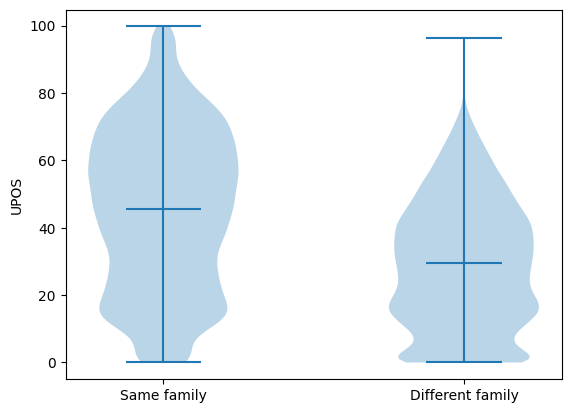

In [79]:
families = [data_full.loc[data_full.source_family == data_full.target_family, "UPOS"],
            data_full.loc[data_full.source_family != data_full.target_family, "UPOS"]]
pyplot.violinplot(families, showmeans=True)
pyplot.xticks([1,2],["Same family", "Different family"])
pyplot.ylabel("UPOS")
pyplot.show()

Yes, within-family transfer have a systematic advantage. Same family plot shows higher mean (horizontal line) UPoS scores; the figure for same family is tighter and more narrow (dispersion), showing it is more stable. 

24. For each corpus where both are available, compute the difference between the in-domain score and the best transfer score obtained from each language family. Analyse the distribution of these deltas (e.g., median, IQR, tails) and discuss which families tend to close the in-domain gap, and in which conditions they fail.

In [84]:
in_dom_score = data_full.query("model_lang == target_lang and model_ud == target_ud").groupby("target_ud")["UPOS"].max()
(data_full.query("model_lang != target_lang").groupby(["target_ud", "source_family"])["UPOS"].max()).unstack().rsub(in_dom_score, axis=0)

source_family,Afro-Asiatic,Atlantic-Congo,Austroasiatic,Austronesian,Dravidian,Indo-European,Japonic,Kartvelian,Koreanic,Sino-Tibetan,Turkic,Uralic,['None']
target_ud,,,,,,,,,,,,,
ab_abnc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abq_atb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
af_afribooms,40.03,69.13,67.32,43.69,44.83,11.73,71.51,87.90,69.03,97.78,49.19,45.26,25.40
aii_as,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ajp_madar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zh_gsd,66.53,84.31,68.04,82.94,72.59,63.92,52.12,64.39,72.27,75.67,63.78,68.08,65.41
zh_gsdsimp,67.64,84.29,68.90,84.12,72.99,64.18,57.16,64.57,73.89,76.62,65.17,69.19,66.61
zh_hk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
in_dom = data_full.query("model_lang == target_lang and model_ud == target_ud").groupby("target_ud")["UPOS"].max()
data_full.query("model_lang != target_lang").groupby(["target_ud", "source_family"])["UPOS"].max()

target_ud  source_family 
ab_abnc    Afro-Asiatic      56.06
           Atlantic-Congo    33.14
           Austroasiatic     29.59
           Austronesian      35.03
           Dravidian         35.68
                             ...  
zh_pud     Koreanic          16.17
           Sino-Tibetan      11.14
           Turkic            20.83
           Uralic            18.61
           ['None']          20.13
Name: UPOS, Length: 3818, dtype: float64